In [310]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

In [311]:
dataset = pd.read_csv('iris_dataset.csv')
dataset.head()
f_vect = dataset.drop(['sepal_length', 'sepal_width', 'species'], axis = 1)

In [312]:
print(f_vect.shape)

(150, 2)


In [313]:
print(f_vect.info(), '\n')
print(f_vect.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB
None 

       petal_length  petal_width
count    150.000000   150.000000
mean       3.758667     1.198667
std        1.764420     0.763161
min        1.000000     0.100000
25%        1.600000     0.300000
50%        4.350000     1.300000
75%        5.100000     1.800000
max        6.900000     2.500000


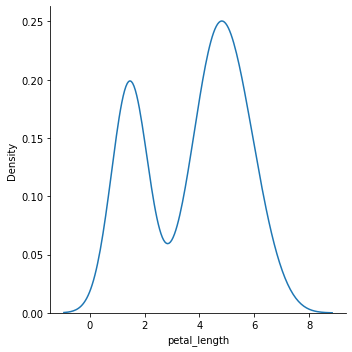

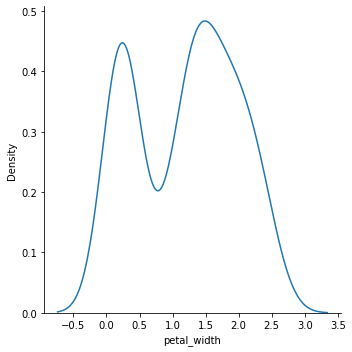

In [314]:
# Kernel desnity estimate for visualization of distributions for interpretation
sns.displot(f_vect, x = "petal_length", kind = "kde")
sns.displot(f_vect, x = "petal_width", kind = "kde")

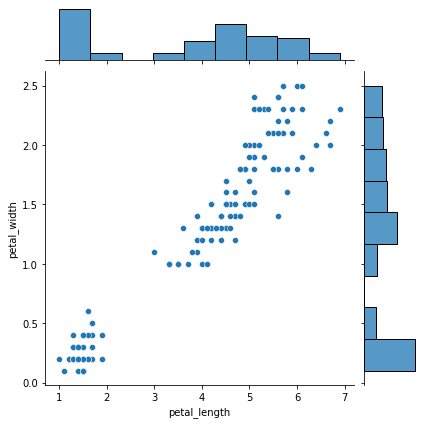

In [315]:
sns.jointplot(data = f_vect, x = "petal_length", y = "petal_width", kind = 'scatter');

In [316]:
# Normal distribution is not present from the graph above
# Min Max Scaling(Normalization) will be used
scaler = MinMaxScaler()
scaler.fit(f_vect)
scaled_values = scaler.transform(f_vect)

In [317]:
# Finding the optimum number of clusters for k-means classification
sse = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(scaled_values)
    sse.append(kmeans.inertia_)

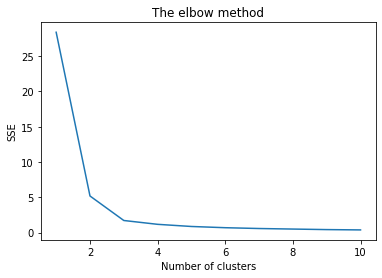

In [318]:
plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') 
plt.show()

In [319]:
kmeans = KMeans(n_clusters = 3)
y_kmeans = kmeans.fit_predict(scaled_values)

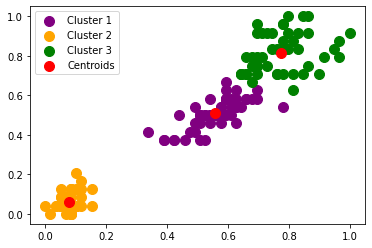

In [320]:
# Visualising the clusters
plt.scatter(scaled_values[y_kmeans == 0, 0], scaled_values[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Cluster 1')
plt.scatter(scaled_values[y_kmeans == 1, 0], scaled_values[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Cluster 2')
plt.scatter(scaled_values[y_kmeans == 2, 0], scaled_values[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

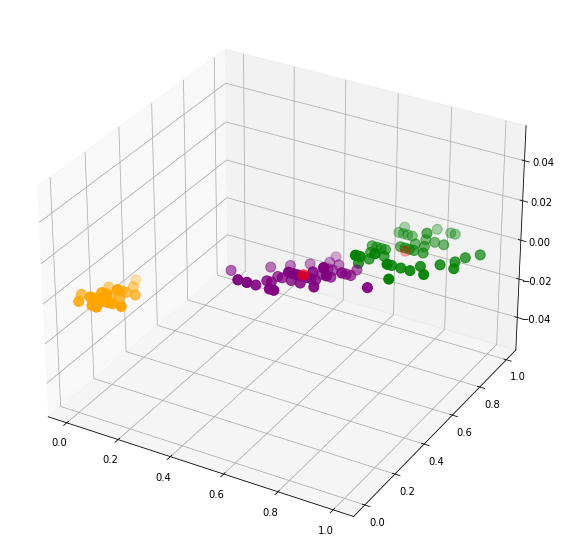

In [321]:
# Looking at the 3 dimensional plot
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(scaled_values[y_kmeans == 0, 0], scaled_values[y_kmeans == 0, 1], s = 100, c = 'purple')
plt.scatter(scaled_values[y_kmeans == 1, 0], scaled_values[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(scaled_values[y_kmeans == 2, 0], scaled_values[y_kmeans == 2, 1], s = 100, c = 'green')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red')
plt.show()